Voraufgabe


Peak 1:
  Höhe (a): 460.45827732587253
  Mean (mu): 330.21311474155783
  Standard deviation (sigma): 35.6158287583428
  Background (b): 30.022496407585912

Peak 2:
  Höhe (a): 264.8882896602694
  Mean (mu): 905.773545158889
  Standard deviation (sigma): 78.32292634990999
  Background (b): 23.88501670696486

Peak 3:
  Höhe (a): 9.759532111733597
  Mean (mu): 2802.650844362247
  Standard deviation (sigma): 0.4114585097139519
  Background (b): 22.18796561961974



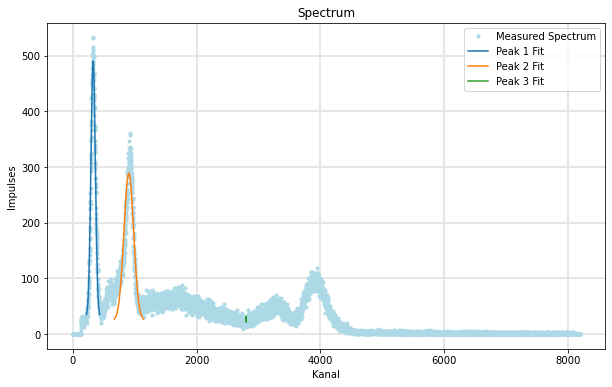

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function for Gaussian fit
def gaussian(x, a, mu, sigma, b):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2)) + b

# Load data from text file
data = np.loadtxt('spectrum.txt')
x_data = data[:, 0]
y_data = data[:, 1]

# Initial guesses for the parameters of the Gaussian fits
def fit_peak(x, y, initial_guess):
    # Perform curve fitting
    params, _ = curve_fit(gaussian, x, y, p0=initial_guess)
    return params

# Fit parameters for each peak
peak_params = []

# Fit first peak
initial_guess_first_peak = (max(y_data), np.argmax(y_data), 1.0, min(y_data))
params_first_peak = fit_peak(x_data, y_data, initial_guess_first_peak)
peak_params.append(params_first_peak)

# Fit second peak
x_data_second_peak = x_data[(x_data > params_first_peak[1] + 3 * params_first_peak[2]) & (x_data < len(y_data))]
y_data_second_peak = y_data[(x_data > params_first_peak[1] + 3 * params_first_peak[2]) & (x_data < len(y_data))]
initial_guess_second_peak = (max(y_data_second_peak), np.argmax(y_data_second_peak), 1.0, min(y_data_second_peak))
params_second_peak = fit_peak(x_data_second_peak, y_data_second_peak, initial_guess_second_peak)
peak_params.append(params_second_peak)

# Fit third peak
x_data_third_peak = x_data[(x_data > params_second_peak[1] + 3 * params_second_peak[2]) & (x_data < len(y_data))]
y_data_third_peak = y_data[(x_data > params_second_peak[1] + 3 * params_second_peak[2]) & (x_data < len(y_data))]
initial_guess_third_peak = (max(y_data_third_peak), np.argmax(y_data_third_peak), 1.0, min(y_data_third_peak))
params_third_peak = fit_peak(x_data_third_peak, y_data_third_peak, initial_guess_third_peak)
peak_params.append(params_third_peak)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Measured Spectrum', color='lightblue', marker='.', linestyle='None')

# Plot individual fits and mark peaks
for i, params in enumerate(peak_params):
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1} Fit')

plt.title('Spectrum')
plt.xlabel('Kanal')
plt.ylabel('Impulses')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()

# Print fit parameters for each peak
for i, params in enumerate(peak_params):
    a_fit, mu_fit, sigma_fit, b_fit = params
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit}')
    print(f'  Mean (mu): {mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit}')
    print(f'  Background (b): {b_fit}')
    print()

plt.show()


In [ ]:
### peak3 왜 저따구냐ㅑㅑㅑ
